# Introduction aux classes

Ce notebook part d'une classe représentant un point en deux dimensions pour aller jusqu'au calcul de la surface d'un polygone quel qu'il soit. La plupart des réponses ont été guidées par LeChat.

In [2]:
class Point2D:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    def __repr__(self):
        return f"Point2D({self.x}, {self.y})"

    def __eq__(self, other):
        if isinstance(other, Point2D):
            return self.x == other.x and self.y == other.y
        return False

    def distance_to(self, other):
        """Calcule la distance entre deux points."""
        return ((self.x - other.x) ** 2 + (self.y - other.y) ** 2) ** 0.5

    @staticmethod
    def intersection_point(p1, p2, p3, p4):
        """Retourne le point d'intersection des segments p1p2 et p3p4, ou None si pas d'intersection."""
        # Calcul des coefficients des droites
        a1 = p2.y - p1.y
        b1 = p1.x - p2.x
        c1 = a1 * p1.x + b1 * p1.y

        a2 = p4.y - p3.y
        b2 = p3.x - p4.x
        c2 = a2 * p3.x + b2 * p3.y

        det = a1 * b2 - a2 * b1
        if det == 0:
            return None  # Droites parallèles

        x = (b2 * c1 - b1 * c2) / det
        y = (a1 * c2 - a2 * c1) / det

        # Vérifie que le point est bien sur les deux segments
        if (
            min(p1.x, p2.x) <= x <= max(p1.x, p2.x)
            and min(p1.y, p2.y) <= y <= max(p1.y, p2.y)
            and min(p3.x, p4.x) <= x <= max(p3.x, p4.x)
            and min(p3.y, p4.y) <= y <= max(p3.y, p4.y)
        ):
            return Point2D(x, y)
        return None

In [3]:
p1 = Point2D(3, 4)
p2 = Point2D(6, 8)
print(p1)  # Affiche : Point2D(3, 4)
print(p1.distance_to(p2))

Point2D(3, 4)
5.0


In [18]:
import matplotlib.pyplot as plt


class Polygone:
    def __init__(self, points=None):
        if points is None:
            self.points = []
        else:
            self.points = list(points)

    def __repr__(self):
        return f"Polygone({self.points})"

    def ajouter_point(self, point):
        """Ajoute un point au polygone."""
        self.points.append(point)

    def perimetre(self):
        """Calcule le périmètre du polygone."""
        if len(self.points) < 2:
            return 0.0
        perimetre = 0.0
        for i in range(len(self.points)):
            p1 = self.points[i]
            p2 = self.points[(i + 1) % len(self.points)]
            perimetre += p1.distance_to(p2)
        return perimetre

    def aire(self):
        """Calcule l'aire du polygone en utilisant la formule du shoelace."""
        if len(self.points) < 3:
            return 0.0
        aire = 0.0
        n = len(self.points)
        for i in range(n):
            x_i, y_i = self.points[i].x, self.points[i].y
            x_j, y_j = self.points[(i + 1) % n].x, self.points[(i + 1) % n].y
            aire += (x_i * y_j) - (x_j * y_i)
        return abs(aire) / 2.0

    def tracer(self, titre="Polygone", couleur="blue"):
        """Trace le polygone dans un notebook avec les indices des points."""
        if len(self.points) < 2:
            print("Pas assez de points pour tracer.")
            return

        x = [p.x for p in self.points]
        y = [p.y for p in self.points]

        # On ferme le polygone en ajoutant le premier point à la fin
        x.append(self.points[0].x)
        y.append(self.points[0].y)

        plt.figure()
        plt.plot(x, y, marker="o", color=couleur)

        # Ajout des indices des points
        for i, (xi, yi) in enumerate(zip(x[:-1], y[:-1])):
            plt.text(xi, yi, f" {i}", color="red", fontsize=12)

        plt.title(titre)
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.grid(True)
        plt.axis("equal")
        plt.show()

    def premier_point_intersection_segments(self):
        """Retourne les coordonnées du premier point d'intersection entre deux segments,
        ainsi que les indices des premières extrémités de chacun des segments.
        Retourne (None, None, None) si pas d'intersection."""
        n = len(self.points)
        for i in range(n):
            for j in range(i + 1, n):
                p1 = self.points[i]
                p2 = self.points[(i + 1) % n]
                p3 = self.points[j]
                p4 = self.points[(j + 1) % n]
                pt_inter = Point2D.intersection_point(p1, p2, p3, p4)
                if pt_inter is not None:
                    return pt_inter, i, j
        return None, None, None

    def inserer_point_intersection(self, i, j, point):
        """Insère le point d'intersection après i et après j dans la liste des points.
        Attention : cela modifie la liste des points du polygone.
        """
        if i >= len(self.points) or j >= len(self.points):
            raise ValueError("Indices invalides")
        # On insère d'abord après le plus grand indice pour ne pas décaler l'autre
        if i > j:
            self.points.insert(j + 1, point)
            self.points.insert(i + 2, point)  # +2 car la liste a déjà grandi
        else:
            self.points.insert(i + 1, point)
            self.points.insert(j + 2, point)  # +2 car la liste a déjà grandi

In [19]:
p1 = Point2D(0, 0)
p2 = Point2D(4, 0)
p3 = Point2D(4, 3)
p4 = Point2D(0, 3)

poly = Polygone([p1, p2, p3, p4])
print(
    poly
)  # Affiche : Polygone([Point2D(0, 0), Point2D(4, 0), Point2D(4, 3), Point2D(0, 3)])
print(poly.perimetre())  # Affiche : 14.0

Polygone([Point2D(0, 0), Point2D(4, 0), Point2D(4, 3), Point2D(0, 3)])
14.0


In [20]:
p1 = Point2D(0, 0)
p2 = Point2D(4, 0)
p3 = Point2D(4, 3)
p4 = Point2D(0, 3)

poly = Polygone([p1, p2, p3, p4])
print(poly.aire())  # Affiche : 12.0

12.0


In [21]:
p1 = Point2D(0, 0)
p2 = Point2D(0, 1)
p3 = Point2D(1, 0)
p4 = Point2D(1, 1)

poly = Polygone([p1, p2, p3, p4])
print(poly.aire())  # Affiche : 12.0

0.0


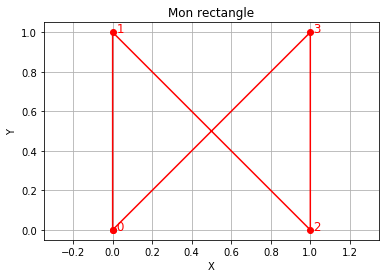

In [22]:
poly.tracer(titre="Mon rectangle", couleur="red")